In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go
import urllib

In [0]:
def plot_clusters(points, cluster_labels, show_annotation=True):
  for c in np.unique(cluster_labels):
    plt.scatter(points[cluster_labels == c,0],points[cluster_labels == c,1])
  if show_annotation:
    for i in range(len(points[:,0])):
      
  plt.show()

10
10


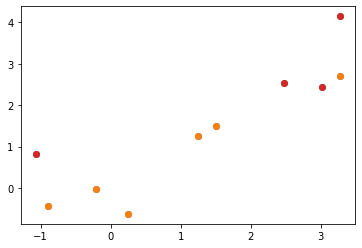

In [0]:
np.random.seed(2)
points = np.vstack((np.random.normal(0,0.5,size=(4,2)),np.random.normal(3,0.5,size=(4,2))))
points = np.vstack((points, np.array([[1.5,1.5]])))
points = np.vstack((points, np.array([[1.25,1.25]])))
cluster = np.random.randint(2, size=(10)).astype('uint8')
print(points[:,0].shape[0])
print(points[:,1].shape[0])
plot_clusters(points,cluster)
 

In [0]:
def heatmap(grid, xlabels, ylabels, xrot=90):   
    cmap = cm.get_cmap("viridis")
    plt.imshow(grid, cmap=cmap)
    plt.xticks(np.arange(0,grid.shape[1],step=1), xlabels, rotation=xrot)
    plt.yticks(np.arange(0, grid.shape[0], step=1), ylabels)

In [0]:
def init(pts,k):
  ret = np.zeros((k,2))
  i = np.random.choice(np.array([i for i in range(len(pts[:,0]))]),k)
  for k,j in enumerate(i):
    ret[k] = pts[j]
  return ret

In [158]:
np.random.seed(2)
K = 5
X = []
for i in range(5):
    X.append(np.random.normal(2**i,(i+1)/5, size=(20,2)))
points = np.vstack(X)
centers = init(points,K)
print(centers)

[[16.18040981 16.55316427]
 [ 1.05131409  0.80224419]
 [ 1.25276374  2.69247387]
 [ 1.25276374  2.69247387]
 [ 2.17339853  2.51135169]]


In [0]:
from sklearn.metrics.pairwise import euclidean_distances
def newcenter(points,centers):
  group = np.zeros(len(points),dtype='uint8')
  newc = np.zeros(centers.shape)
  dist =  euclidean_distances(points,centers)
  for i in range(len(dist)):
      group[i] = np.argmin(dist[i])
  for i,v in enumerate(np.unique(group)):
    x = points[group == v]
    newc[i] = np.mean(x,axis=0)
    print(newc[i])

  dist =  euclidean_distances(points,newc)
  for i in range(len(dist)):
      group[i] = np.argmin(dist[i])

  return group,newc

[15.95929128 15.86160636]
[1.05286926 1.04666466]
[1.23333979 2.32704746]
[5.03199318 4.95593967]
[15.95929128 15.86160636]
[1.05286926 1.04666466]
[1.23333979 2.32704746]
[5.03199318 4.95593967]


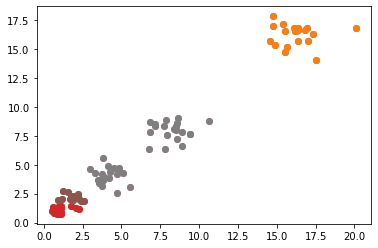

In [160]:
prev = None
while True:
  group,newc = newcenter(points,centers)
  if (newc == prev).all():
    break
  prev = newc
plot_clusters(points,group)

[-0.1860322  -0.58092684]
[0.12146485 0.33490151]
[-0.1860322  -0.58092684]
[0.12146485 0.33490151]


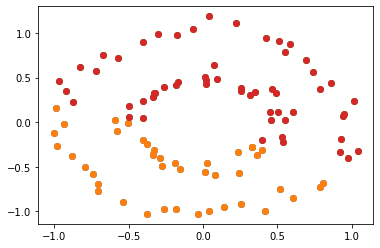

In [164]:
from sklearn.datasets import make_circles
 
points, _ = make_circles(100, noise=0.06, factor=0.5)
centers = init(points,2)
prev = None
while True:
  group,newc = newcenter(points,centers)
  if (newc == prev).all():
    break
  prev = newc
plot_clusters(points,group)
